In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [2]:
df = pd.read_csv('electric_cars_clean_data.csv')
df

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,Charge Duration (h),Day,platform,distance,userId,stationId,locationId,managerVehicle,facilityType,Facility Type
0,1366563,7.78,0.00,0014-11-18 15:40:26,0014-11-18 17:11:04,15,17,1.51,Tue,android,NaN,35897499,582873,461655,0,3,R&D
1,3075723,9.74,0.00,0014-11-19 17:40:26,0014-11-19 19:51:04,17,19,2.18,Wed,android,NaN,35897499,549414,461655,0,3,R&D
2,4228788,6.76,0.58,0014-11-21 12:05:46,0014-11-21 16:46:04,12,16,4.67,Fri,android,NaN,35897499,129465,461655,0,3,R&D
3,3173284,6.17,0.00,0014-12-03 19:16:12,0014-12-03 21:02:18,19,21,1.77,Wed,android,NaN,35897499,569889,461655,0,3,R&D
4,3266500,0.93,0.00,0014-12-11 20:56:11,0014-12-11 21:14:06,20,21,0.30,Thu,android,NaN,35897499,414088,566549,0,3,R&D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,7021565,6.74,0.00,0015-10-01 16:31:18,0015-10-01 19:59:08,16,19,3.46,Thu,ios,13.352643,59574735,884707,648339,0,2,Office
3391,3758092,6.86,0.00,0015-10-02 16:28:48,0015-10-02 19:27:05,16,19,2.97,Fri,ios,13.352643,59574735,884707,648339,0,2,Office
3392,5858374,6.07,0.00,0015-09-30 16:54:22,0015-09-30 20:24:06,16,20,3.50,Wed,android,2.337085,32070852,638536,868085,0,3,R&D
3393,2586645,5.74,0.00,0015-09-24 11:43:02,0015-09-24 13:55:12,11,13,2.20,Thu,ios,4.671064,58023207,818217,700367,1,2,Office


In [3]:
df.drop(columns=["created","ended"], inplace=True)

## DATA ANALYSIS ANGLES
_____
### Per session

* Average charge duration per session

* Average charge duration per session according to week day (7 charts)

* Average charge cost per session

* Average charge power consumption per session  
_____

### Per day / time

* Average number of charge sessions per week day (7 chars)

* Average time of charging sessions per week day (7 chars)

* Average charge start time according to day

* Average end charge time according to day
_______

### Per location

* Frequency of use of a specific charging location according to userId => hist

* Frequency of use of a specific charging location over time => line chart

* Distribution stationId according to locationId => radar chart ?

_____
### Overall

* Average time of charging overall

* Repartition of plateform used (Ios, Android, Other) on overall charge sessions => pie chart

* Fluctuation of energy consumption on the period (data description says period = ) !!  

_______





## Average charge time per day

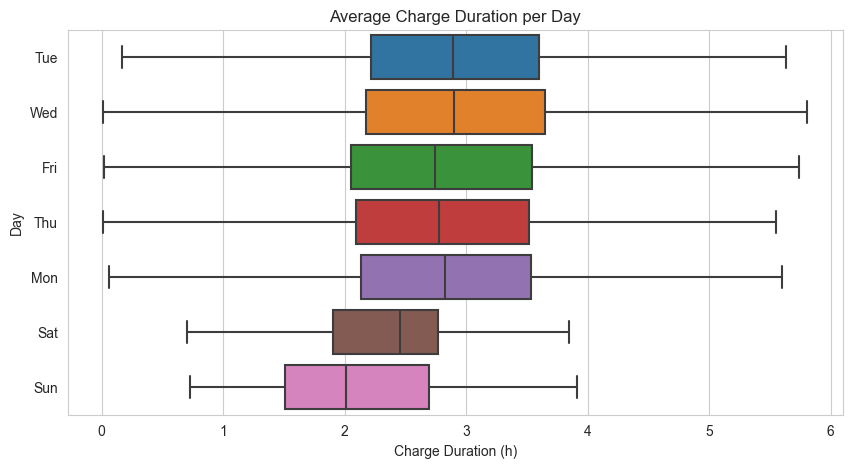

In [21]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(ax=ax, data=df, x="Charge Duration (h)" , y= "Day", showfliers=False)
# plt.show()
plt.title('Average Charge Duration per Day')
plt.savefig('chargeduration_perday.png')

## Charge duration hour per Station

C:\Users\User\AppData\Local\Temp\ipykernel_1896\3091840447.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=df["stationId"], rotation=45, size=4)


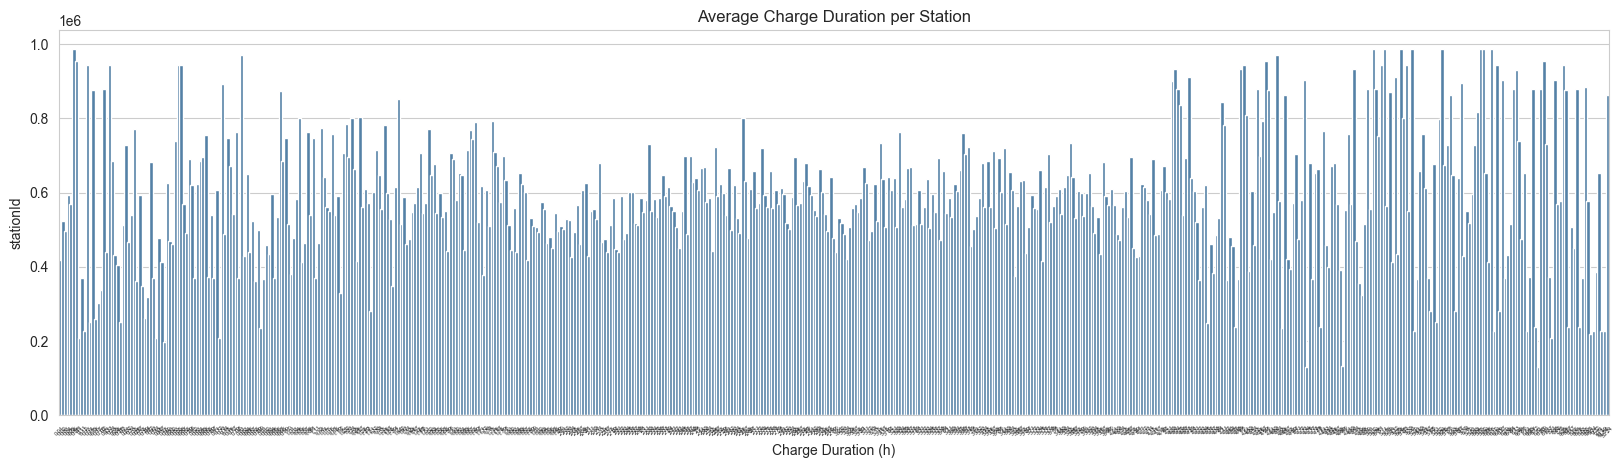

In [20]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(20,5))
ax.set_xticklabels(labels=df["stationId"], rotation=45, size=4)
sns.barplot(ax=ax, data=df, x="Charge Duration (h)", y="stationId", errorbar=None, width=1.25, color="steelblue");

plt.title('Average Charge Duration per Station')
plt.savefig('avg_chargeduration_perstation.png')

## Average power draw per charge session per day

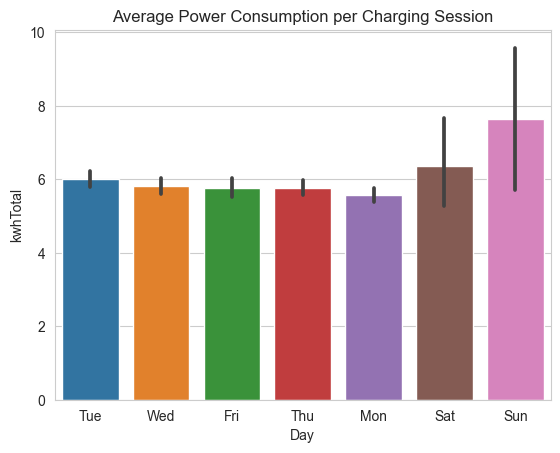

In [26]:
sns.set_style("whitegrid")
sns.barplot(data=df, x="Day", y="kwhTotal" ).set(title='Average Power Consumption per Charging Session')
# plt.show()
plt.savefig('avg_powerdraw_percharge.png')

## Average time of charging overall

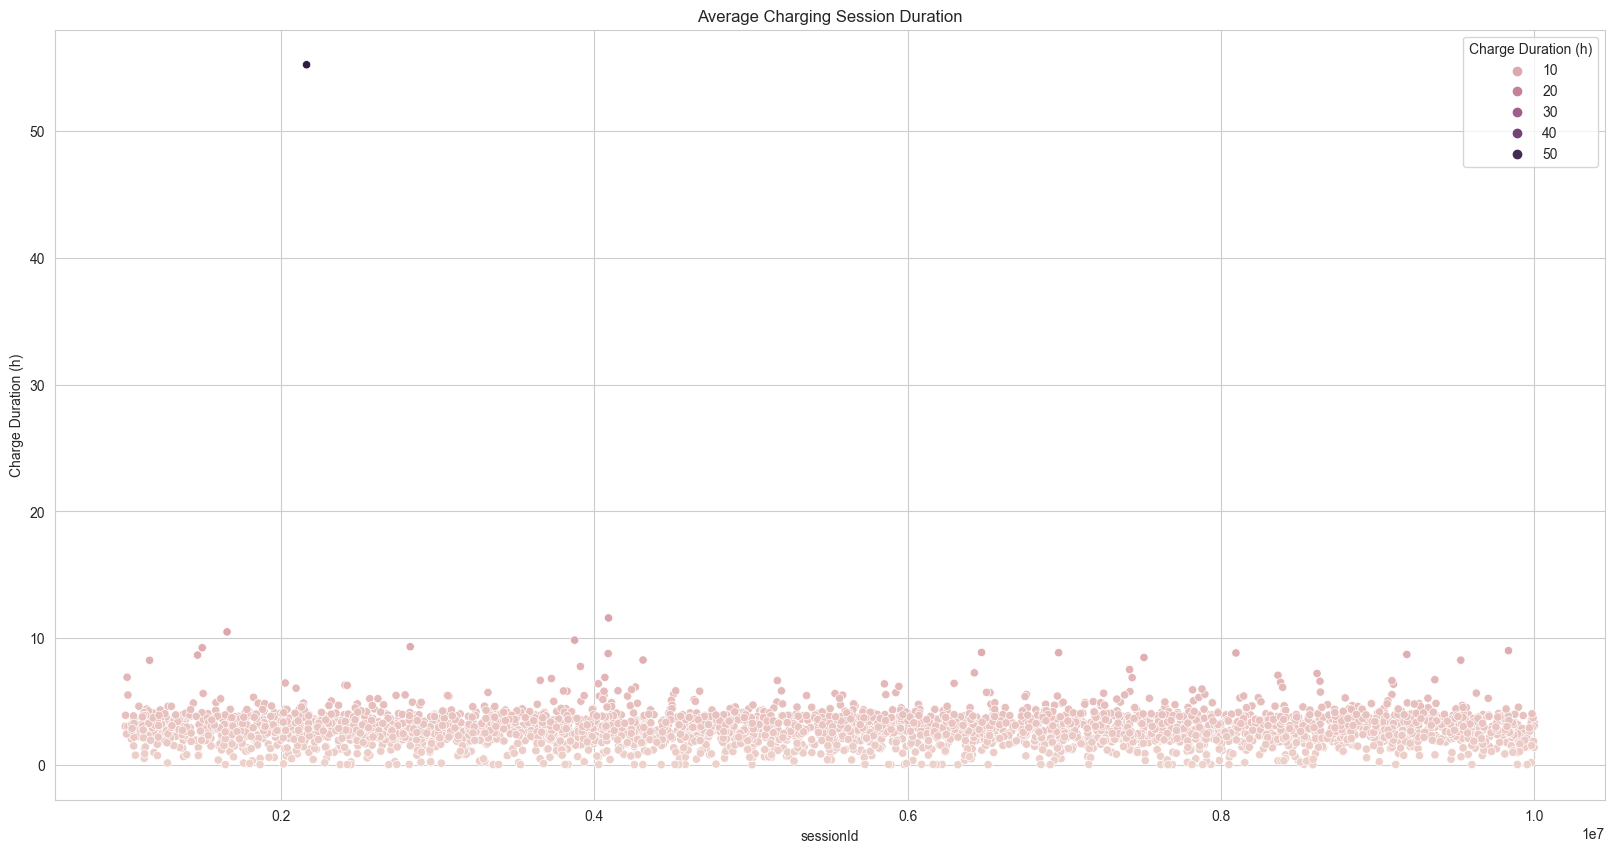

In [27]:
# average charging time over period

fig, ax = plt.subplots(figsize=(20,10))

sns.scatterplot(ax=ax, data=df, x="sessionId", y="Charge Duration (h)", hue="Charge Duration (h)").set(title='Average Charging Session Duration')
# plt.show()
plt.savefig('avg_sessionduration.png')




## Consumption per charging session

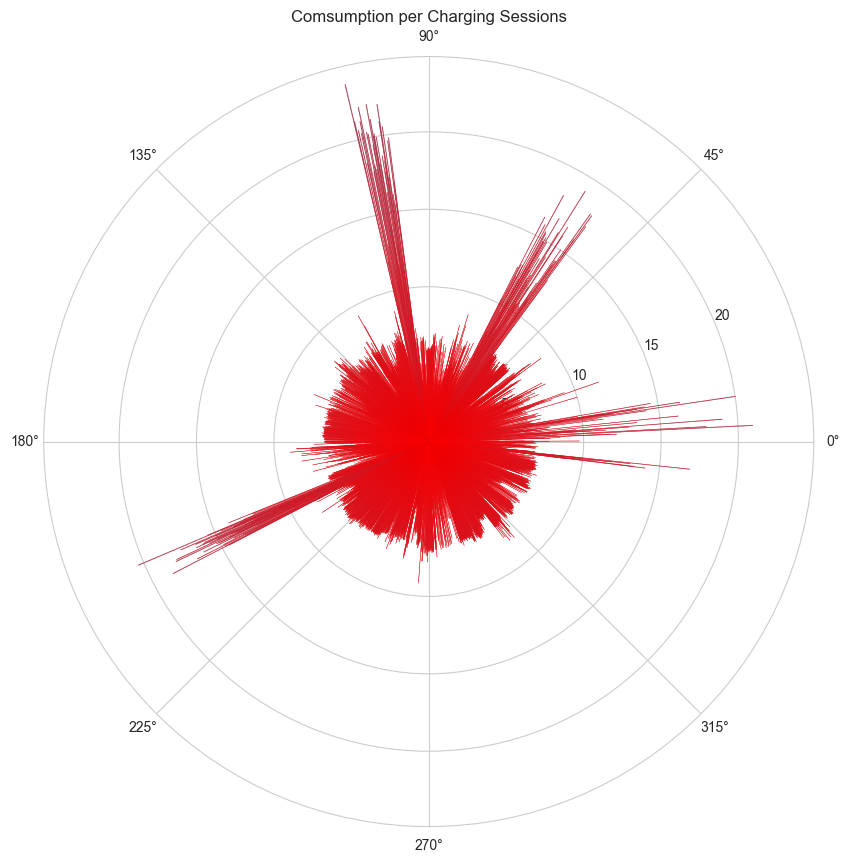

In [29]:
# set figure size
plt.figure(figsize=(20,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
# plt.axis('off')

# Set the coordinates limits
upperLimit = 10
lowerLimit = 0

# Compute max and min in the dataset
max = df['kwhTotal'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df['kwhTotal'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=0.2, 
    edgecolor="red")

plt.title('Comsumption per Charging Sessions')
# plt.show()
plt.savefig('consumption_per_charge.png')

## Charge time per user

C:\Users\User\AppData\Local\Temp\ipykernel_1896\348502877.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=df["userId"], rotation=45, size=8)


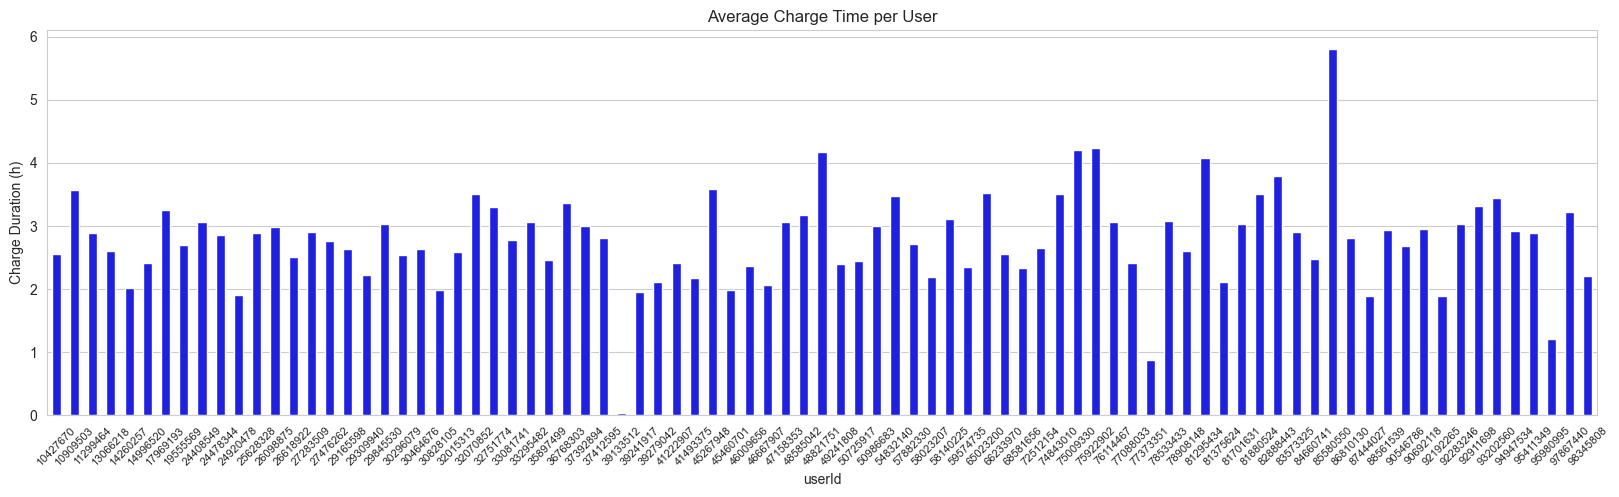

In [31]:
fig, ax = plt.subplots(figsize=(20,5))

ax.set_xticklabels(labels=df["userId"], rotation=45, size=8)

sns.barplot(ax=ax, data=df, x="userId", y="Charge Duration (h)", width= 0.5, errorbar=None, color='blue').set(title='Average Charge Time per User')
# plt.show()
plt.savefig('avg_charge_duration_per_user.png')

## Charge time vs cost

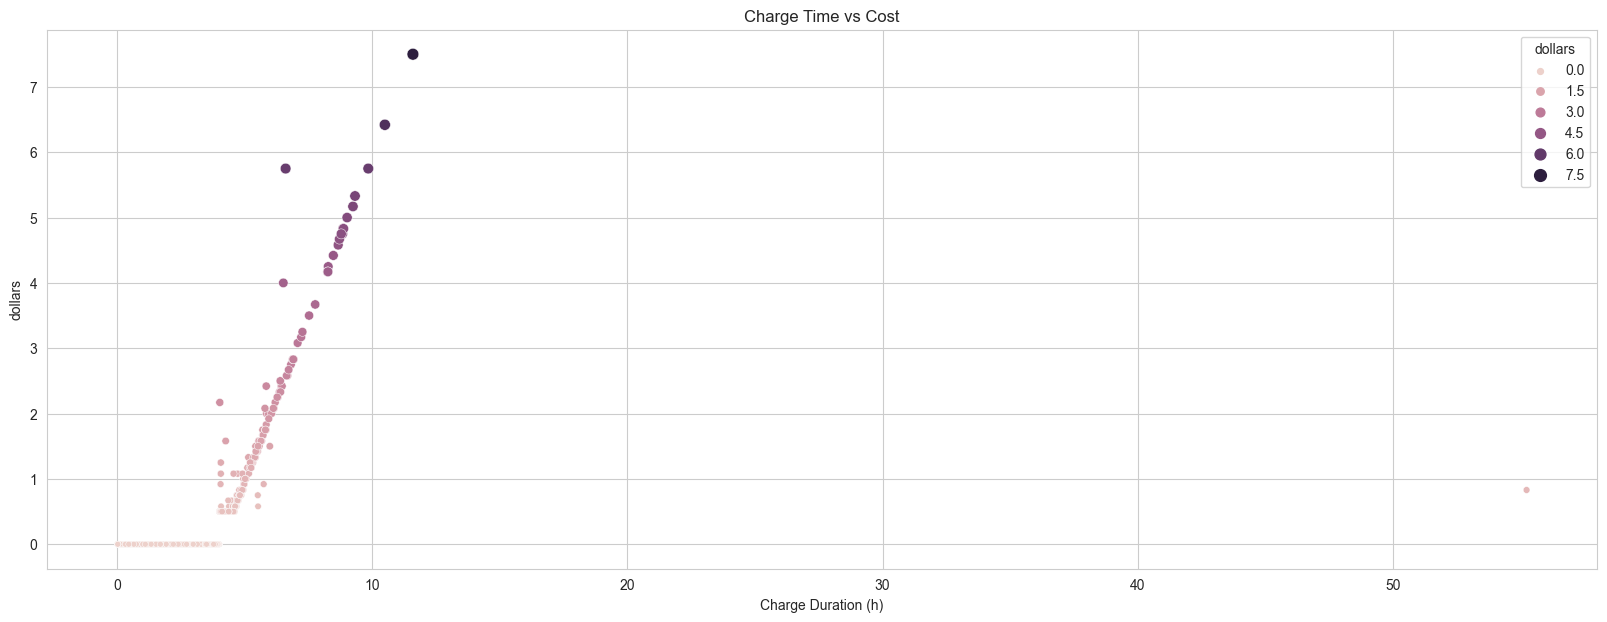

In [32]:
fig, ax = plt.subplots(figsize=(20,7))

sns.scatterplot(ax=ax, data=df, x="Charge Duration (h)", y='dollars', hue='dollars', size='dollars').set(title='Charge Time vs Cost')
# plt.show()
plt.savefig('charge_time_on_cost.png')

# charge vs stationId

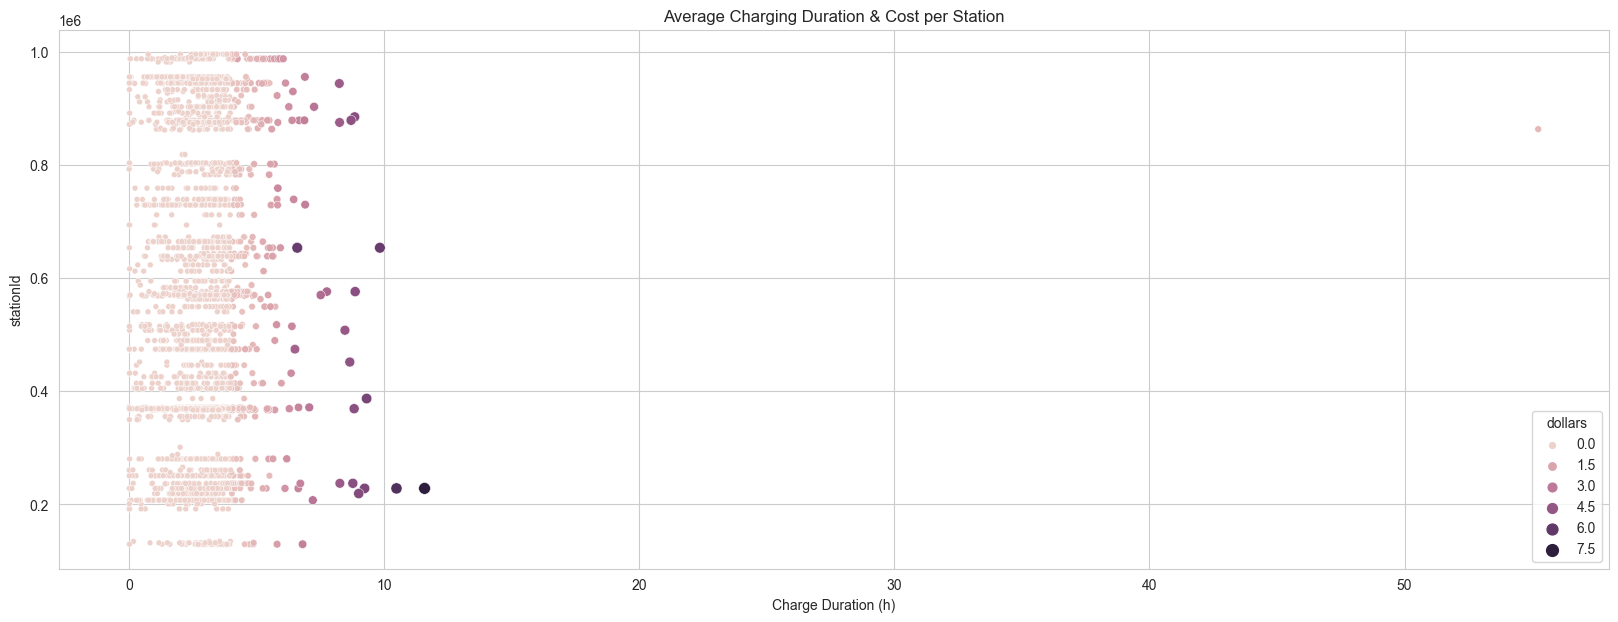

In [33]:
fig, ax = plt.subplots(figsize=(20,7))

sns.scatterplot(ax=ax, data=df, x="Charge Duration (h)", y='stationId', hue='dollars', size='dollars').set(title='Average Charging Duration & Cost per Station')
# plt.show()
plt.savefig('duration_cost_per_station.png')

### Average charge start time per day

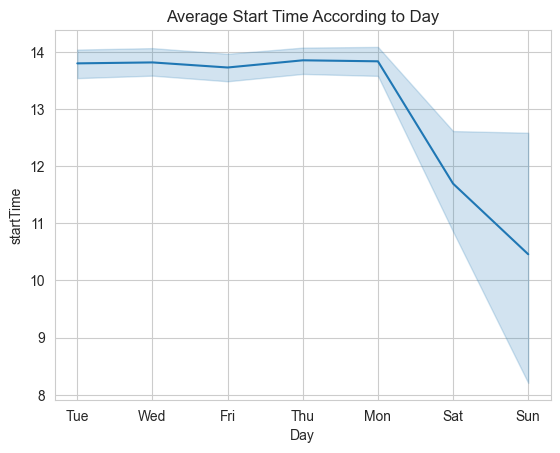

In [34]:
sns.lineplot(data=df, x="Day", y="startTime").set(title='Average Start Time According to Day')
# plt.show()
plt.savefig('avg_charge_statrtime.png')


### Repartition facility type

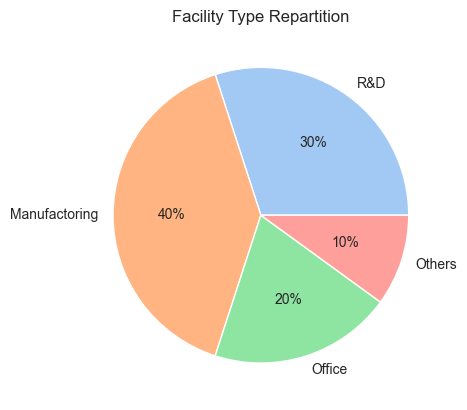

In [36]:
data = df["facilityType"].unique()
labels = ['R&D', 'Manufactoring', 'Office', 'Others']

colors = sns.color_palette('pastel')[0:5]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
# plt.show()
plt.title('Facility Type Repartition')
plt.savefig('facility_repartition.png')

In [14]:
df.head()

,sessionId,kwhTotal,dollars,startTime,endTime,Charge Duration (h),Day,platform,distance,userId,stationId,locationId,managerVehicle,facilityType,Facility Type
0,1366563,7.78,0.00,15,17,1.51,Tue,android,NaN,35897499,582873,461655,0,3,R&D
1,3075723,9.74,0.00,17,19,2.18,Wed,android,NaN,35897499,549414,461655,0,3,R&D
2,4228788,6.76,0.58,12,16,4.67,Fri,android,NaN,35897499,129465,461655,0,3,R&D
3,3173284,6.17,0.00,19,21,1.77,Wed,android,NaN,35897499,569889,461655,0,3,R&D
4,3266500,0.93,0.00,20,21,0.30,Thu,android,NaN,35897499,414088,566549,0,3,R&D


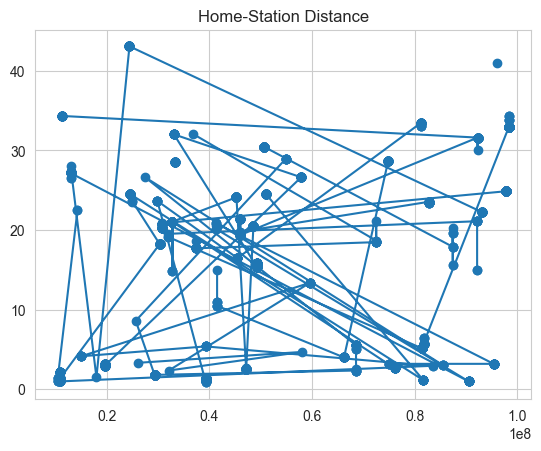

In [38]:
  # data
#   df = pd.DataFrame({
#       'x_axis': range(1,10),
#       'y_axis': np.random.randn(9)*80+range(1,10)
#   })

  # # plot
  # plt.plot('x_axis', 'y_axis', data=df, linestyle='-', marker='o')
  # plt.show()

plt.plot( 'userId', 'distance', data=df , linestyle='-', marker='o')
# plt.show()
plt.title('Home-Station Distance')
plt.savefig('wtf_1.png')

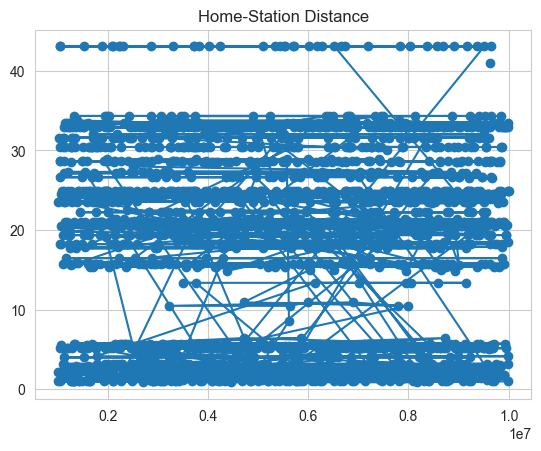

In [39]:
plt.plot( 'sessionId', 'distance', data=df , linestyle='-', marker='o')
# plt.show()
plt.title('Home-Station Distance')
plt.savefig('wtf_2.png')